# Programming a Deep Neural Network with Flux

## MNIST Data Set

The MNIST data set consists of 70,000 images of hand written digits, 60,000 of which are typically used as labeled training examples and the other 10,000 used for testing your learning model on. The following picture represent a sample of some of the images.

<img src="MnistExamples.png" alt="Drawing" style="width: 500px;"/>

We can load this dataset with the ```MLDatasets.jl``` package. Load this data by running the following code.


---

In [11]:
using MLDatasets, Flux
using Plots, Images
using Statistics


# load full training set
train_x, train_y = MNIST.traindata(Float32)

# load full test set
test_x,  test_y  = MNIST.testdata(Float32)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

---

Each image is comprised of a $28\times 28$ grey scaled grid of pixel values. These values are floating point numbers in the interval $(0,1)$, where darker pixels will have values closer to $1$ and lighter pixels will have values closer to $0$. The following image represents one such example. 

<img src="MNIST-Matrix.png" alt="Drawing" style="width: 600px;"/>

We can view the image of one of these matrices by running the following code.

---

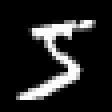

In [12]:
# Images.colorview
colorview(Gray, train_x[:, :, 1]')

---

Tensors are simply multi-dimensional matrices. The data structures ```train_x``` and ```test_x``` are stored as 3 dimensional tensors. 

<img src="order-3-tensor.png" alt="Drawing" style="width: 300px;"/>

This can be varified by viewing the size of these variables. 


---

In [13]:
# Show the dimensions of the training data 
@show size(train_x)
@show size(train_y)
println()

# Show the dimensions of the testing data
@show size(test_x)
@show size(test_y)
println()

size(train_x) = (28, 28, 60000)
size(train_y) = (60000,)

size(test_x) = (28, 28, 10000)
size(test_y) = (10000,)



---

## Image Flattening

Simple **dense neural networks** take as input feature vectors which are column vectors. In order to feed our images into such a network we must **flatten** the matrix into a column vector.

<img src="flatten.png" alt="Drawing" style="width: 500px;"/>

We can do this for each image matrix we are considering by calling the ```Flux.flatten()```. Note, that $784 = 28 \times 28$. By running the following code we reshape our images and store them in new variables. 

## One-Hot Encoding 

<img src="onehot.jpeg" alt="Drawing" style="width: 500px;"/>

## Row Features and Column Instances 
Unlike most Python machine learning API's, Flux.jl and other Julia machine learning API's, we will store our training and testing data with feature measurements in the rows of our arrays and columns being instances. In the case of our 3-dimensional tensor, the 3rd dimension represents the number of instances of our data, i.e., the number of digits . 

---

In [14]:
# Reshape Data in order to flatten each image into a linear array
xtrain = Flux.flatten(train_x)
xtest = Flux.flatten(test_x)

# One-hot-encode the labels
ytrain, ytest = Flux.onehotbatch(train_y, 0:9), Flux.onehotbatch(test_y, 0:9)

# Print the dimensions of training feature matrices and training label matrices
println("xtrain dimensions = $(size(xtrain))")
println("ytrain dimensions = $(size(ytrain))")

xtrain dimensions = (784, 60000)
ytrain dimensions = (10, 60000)


In [15]:
# Get the dimensions of train_x
(m, n, z) = size(train_x)

# Chain together functions!
model = Flux.Chain(
                    Dense(m*n, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 10, Flux.σ),
                )

# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

# Define the accuracy 
accuracy(x, y) = Statistics.mean(Flux.onecold(model(x)) .== Flux.onecold(y))

# ADAM would be the perferred optimizer for serious deep learning
#opt = Flux.ADAM()

# Define gradient descent optimizer
# Flux.Descent
opt = Descent(0.23)

# Format your data
data = [(xtrain, ytrain)]

# Collect weights and bias for your model
parameters = Flux.params(model)

println("Old Loss = $(loss(xtrain, ytrain))")
println("Old Accuracy = $(accuracy(xtrain, ytrain)) \n")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)


println("New Loss = $(loss(xtrain, ytrain))")
println("New Accuracy = $(accuracy(xtrain, ytrain))")

Old Loss = 0.23771662
Old Accuracy = 0.0993 

New Loss = 0.2248549
New Accuracy = 0.0993


In [16]:
println("Old Loss = $(loss(xtrain, ytrain))")
println("Old Accuracy = $(accuracy(xtrain, ytrain)) \n")

(m, n) = size(xtrain)

# Train the model over 100_000 epochs
for epoch in 1:100_000
    # Randomly select a entry of training data 
    i = rand(1:n)
    data = [(xtrain[:, i], ytrain[:, i])]

    # Implement Stochastic Gradient Descent 
    Flux.train!(loss, parameters, data, opt)

    # Print loss function values 
    if epoch % 10_000 == 0
        println("Epoch: $(epoch)")
        @show loss(xtrain, ytrain)
        @show accuracy(xtrain, ytrain)
        println()
    end
end

Old Loss = 0.2248549
Old Accuracy = 0.0993 

Epoch: 10000
loss(xtrain, ytrain) = 0.052091498f0
accuracy(xtrain, ytrain) = 0.7006666666666667

Epoch: 20000
loss(xtrain, ytrain) = 0.027615199f0
accuracy(xtrain, ytrain) = 0.8556

Epoch: 30000
loss(xtrain, ytrain) = 0.019184524f0
accuracy(xtrain, ytrain) = 0.8957166666666667

Epoch: 40000
loss(xtrain, ytrain) = 0.016192852f0
accuracy(xtrain, ytrain) = 0.9071833333333333

Epoch: 50000
loss(xtrain, ytrain) = 0.014533965f0
accuracy(xtrain, ytrain) = 0.9142666666666667

Epoch: 60000
loss(xtrain, ytrain) = 0.013431152f0
accuracy(xtrain, ytrain) = 0.92065

Epoch: 70000
loss(xtrain, ytrain) = 0.012511344f0
accuracy(xtrain, ytrain) = 0.9255333333333333

Epoch: 80000
loss(xtrain, ytrain) = 0.011904356f0
accuracy(xtrain, ytrain) = 0.9292166666666667

Epoch: 90000
loss(xtrain, ytrain) = 0.011409775f0
accuracy(xtrain, ytrain) = 0.9313666666666667

Epoch: 100000
loss(xtrain, ytrain) = 0.011207972f0
accuracy(xtrain, ytrain) = 0.9332333333333334



Predict digit: 9
9


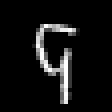

In [25]:
i = rand(1:1_000)

predict(i) = argmax(model(xtest[:, i])) - 1

digit = predict(i)
println("Predict digit: $(digit)")
println(argmax(ytest[:, i]) - 1)

colorview(Gray, test_x[:,:,i]')

Predict digit: 1
1


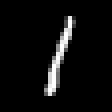

In [21]:
i = rand(1:1_000)

predict(i) = argmax(model(xtest[:, i])) - 1

digit = predict(i)
println("Predict digit: $(digit)")
println(argmax(ytest[:, i]) - 1)

colorview(Gray, test_x[:,:,i]')

In [27]:
using TensorBoardLogger, Logging

# Create tensorboard logger
# TensorBoardLogger.TBLogger
logger = TBLogger("content/log", tb_overwrite)


# Log some images as samples (not needed)
with_logger(logger) do
    images = TBImage(train_x[:, :, 1:10], WHN)
    @info "mnist/samples" pics = images log_step_increment=0
end

# Function to get dictionary of model parameters
function fill_param_dict!(dict, m, prefix)
    if m isa Chain
        for (i, layer) in enumerate(m.layers)
            fill_param_dict!(dict, layer, prefix*"layer_"*string(i)*"/"*string(layer)*"/")
        end
    else
        for fieldname in fieldnames(typeof(m))
            val = getfield(m, fieldname)
            if val isa AbstractArray
                val = vec(val)
            end
            dict[prefix*string(fieldname)] = val
        end
    end
end


# Callback to log information after every epoch
function TBCallback()
    param_dict = Dict{String, Any}()
    fill_param_dict!(param_dict, model, "")
    with_logger(logger) do
      @info "model" params=param_dict log_step_increment=0
      @info "train" loss=loss(xtrain, ytrain) acc=accuracy(xtrain, ytrain) log_step_increment=0
      @info "test" loss=loss(xtest, ytest) acc=accuracy(xtest, ytest)
    end
  end

TBCallback (generic function with 1 method)

In [28]:
# Get the dimensions of train_x!
(m, n, z) = size(train_x)

# Chain together functions!
model = Flux.Chain(
                    Dense(m*n, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 10, Flux.σ),
                )

# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

# Define the accuracy 
accuracy(x, y) = Statistics.mean(Flux.onecold(model(x) |> cpu) .== Flux.onecold(y |> cpu))

# ADAM would be the perferred optimizer for serious deep learning
opt = Flux.ADAM()


# Format your data
data = [(xtrain, ytrain)]

# Collect weights and bias for your model
parameters = Flux.params(model)

println("Old Loss = $(loss(xtrain, ytrain))")

# Train the model over 100 epochs
for epoch in 1:100
    Flux.train!(loss, parameters, data, opt, cb = Flux.throttle(TBCallback, 5))
end

println("New Loss = $(loss(xtrain, ytrain))")

Old Loss = 0.26972353
New Loss = 0.08993315
